<a href="https://colab.research.google.com/github/alexusm3/FEMA-Data-Project-SP2021/blob/main/Alexus_Moore_JOUR460_Final_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2017-2021 FEMA Storm Data** 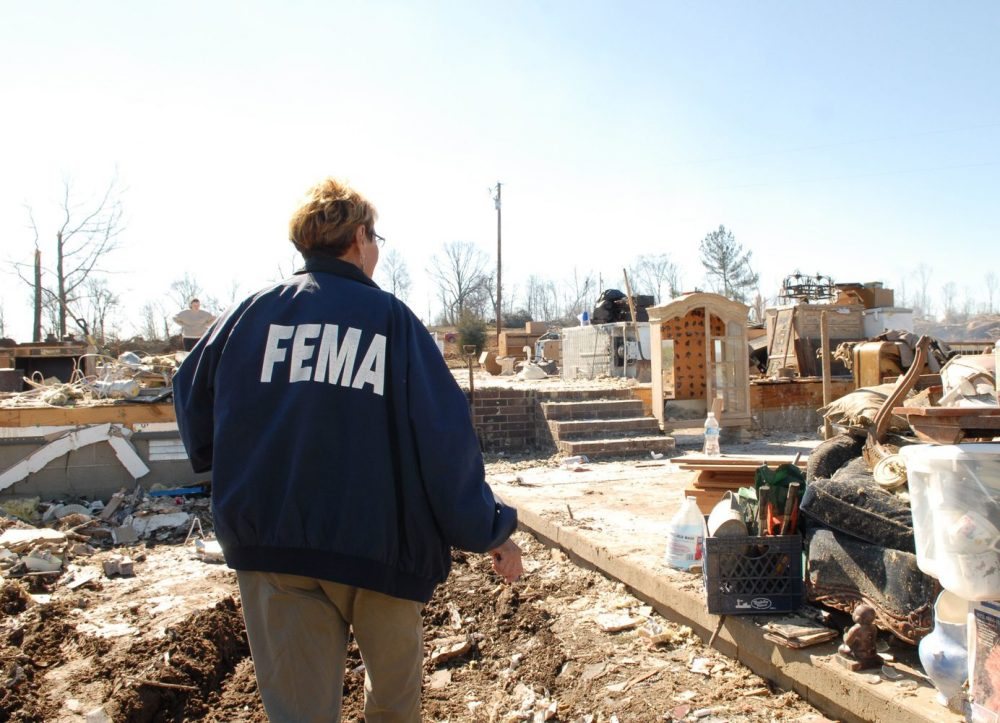

# **Description of Data**

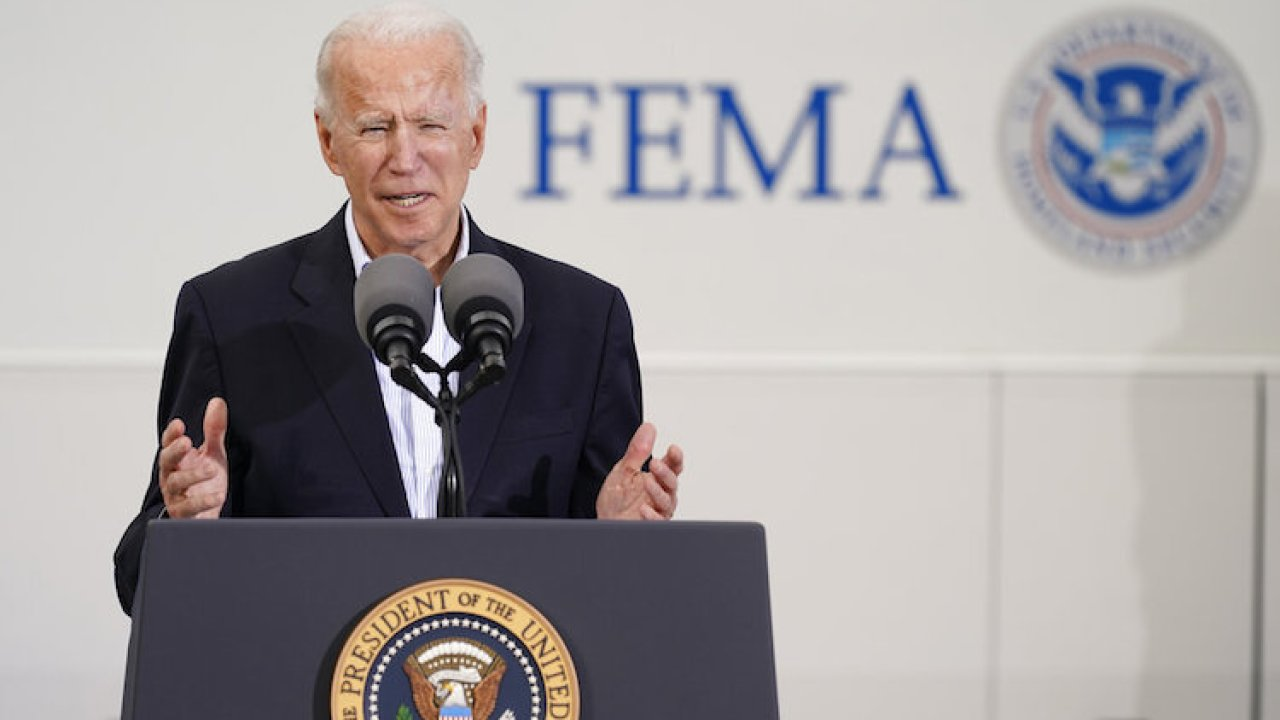

FEMA (Federal Emergency Management Agency) is an agency of the United States Department of Homeland Security, created by President Jimmy Carter in the year 1979. FEMA's main goals include supporting U.S. citizens, residents, and first responders with regards to hazards, such as natural disasters, acts of terrorism, and other man-made disasters. 

The dataset, initially titled 'Public Assistance Funded Projects Details', contains lists of obligated public assistance details, public assistance recipients, and every funded, individual project since the year 1998. 

The initial dataset (as of the downloaded date of April 6, 2021), contained over 700,000 records. Data fields include the type of incident, size of the project, state, county, and total amount FEMA delegated to the projects. 

# **Data Cleaning**

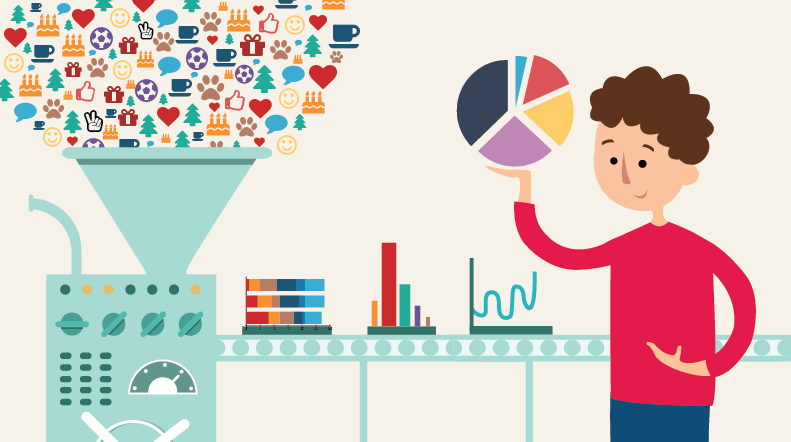

1.   I uploaded the initial CSV file into Open Refine for cleaning. 
2.   I changed two 'incident types' that were identical, but just had different spellings, to the same term. The terms were 'thunderstorm' and 'thunder storm'. 
3.   I deleted multiple rows and colums in order to make the data set somewhat more manageable. I deleted 18 years of data (1998-2016) and multiple columns that were not essential to my analysis. These columns included fields such as the disaster number, project worksheet number, county code, state number code, and the hash. 




# **Preview of Dataset**

In [31]:
import pandas as pd
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import numpy as np

In [34]:
FEMA = pd.read_csv('/content/FEMA.csv')

In [45]:
FEMA.shape

(79141, 10)

In [53]:
FEMA.dropna(inplace = True)

In [54]:
FEMA.head()

DeclarationDate IncidentType  ... FederalShareObligated TotalObligated
0  2017-09-20T04:00:00.000Z    Hurricane  ...          9.459885e+09   9.459885e+09
1  2020-03-25T04:00:00.000Z   Biological  ...          4.527483e+09   4.527483e+09
2  2017-09-20T04:00:00.000Z    Hurricane  ...          3.662729e+09   3.662729e+09
3  2017-09-20T04:00:00.000Z    Hurricane  ...          2.065211e+09   2.065211e+09
4  2020-03-25T04:00:00.000Z   Biological  ...          1.313498e+09   1.313498e+09

[5 rows x 10 columns]

In [55]:
FEMA.tail()

DeclarationDate  ... TotalObligated
79135  2020-04-07T04:00:00.000Z  ...            0.0
79136  2020-04-09T04:00:00.000Z  ...            0.0
79137  2020-07-09T04:00:00.000Z  ...            0.0
79138  2020-07-09T04:00:00.000Z  ...            0.0
79139  2020-08-17T04:00:00.000Z  ...            0.0

[5 rows x 10 columns]

# **Question I**

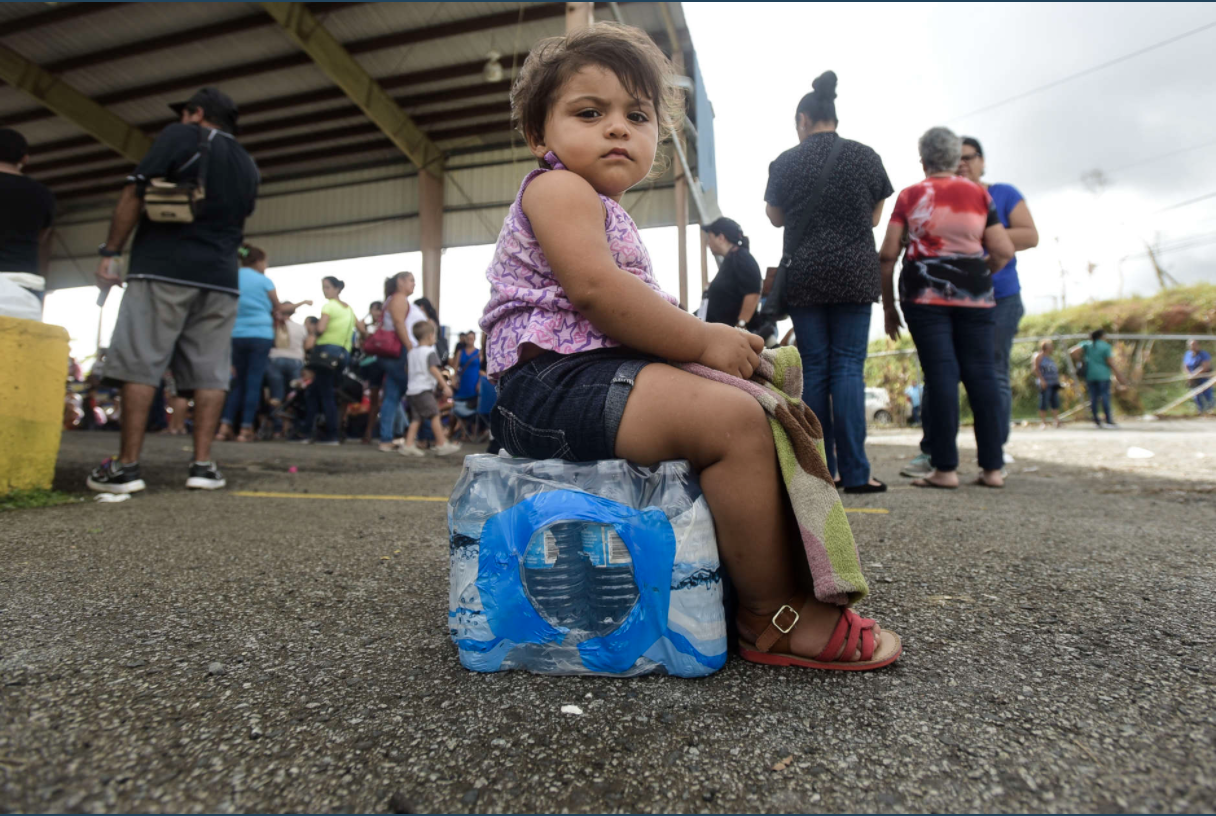

FEMA [stated](https://federalnewsnetwork.com/management/2018/04/fema-has-a-blunt-new-message-it-wont-be-there-for-every-future-disaster/slide/6/) in April of 2018 that they will not be able to support every future disaster. "FEMA, can’t, for example, manage and lead emergency response efforts for every single disaster."

Are reported natural disasters in the United States increasing or decreasing?

In [56]:
YEAR17 = FEMA[FEMA['DeclarationDate'].str.contains('2017')]

In [57]:
YEAR17.shape

(34983, 10)

In [58]:
YEAR18 = FEMA[FEMA['DeclarationDate'].str.contains('2018')]

In [59]:
YEAR18.shape

(15919, 10)

In [60]:
YEAR19 = FEMA[FEMA['DeclarationDate'].str.contains('2019')]

In [61]:
YEAR19.shape

(19273, 10)

In [62]:
YEAR20 = FEMA[FEMA['DeclarationDate'].str.contains('2020')]

In [63]:
YEAR20.shape

(8954, 10)

In [64]:
YEAR21 = FEMA[FEMA['DeclarationDate'].str.contains('2021')]

In [65]:
YEAR21.shape

(11, 10)

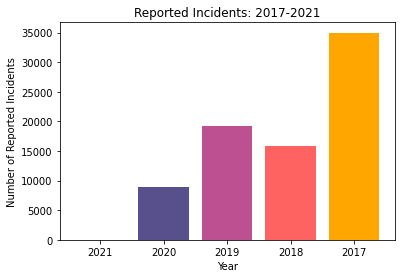

In [71]:
height = [11, 8954, 19273, 15919, 34983]
bars = ('2021', '2020', '2019', '2018', '2017')
y_pos = np.arange(len(bars))


plt.bar(y_pos, height)


plt.xticks(y_pos, bars)

plt.title('Reported Incidents: 2017-2021')
plt.xlabel('Year')
plt.ylabel('Number of Reported Incidents')

plt.bar(y_pos, height, color = ['#003f5c', '#58508d', '#bc5090','#ff6361','#ffa600'])

plt.show()

# **Conclusion and Interpretation**

2017 had the highest number of reported incidents at nearly 35000 reports. The reports dropped drastically in 2018, slighty increased in 2019, and fell again for 2020. One can predict that for 2021 the reports will increase once again.  

# **Question II**

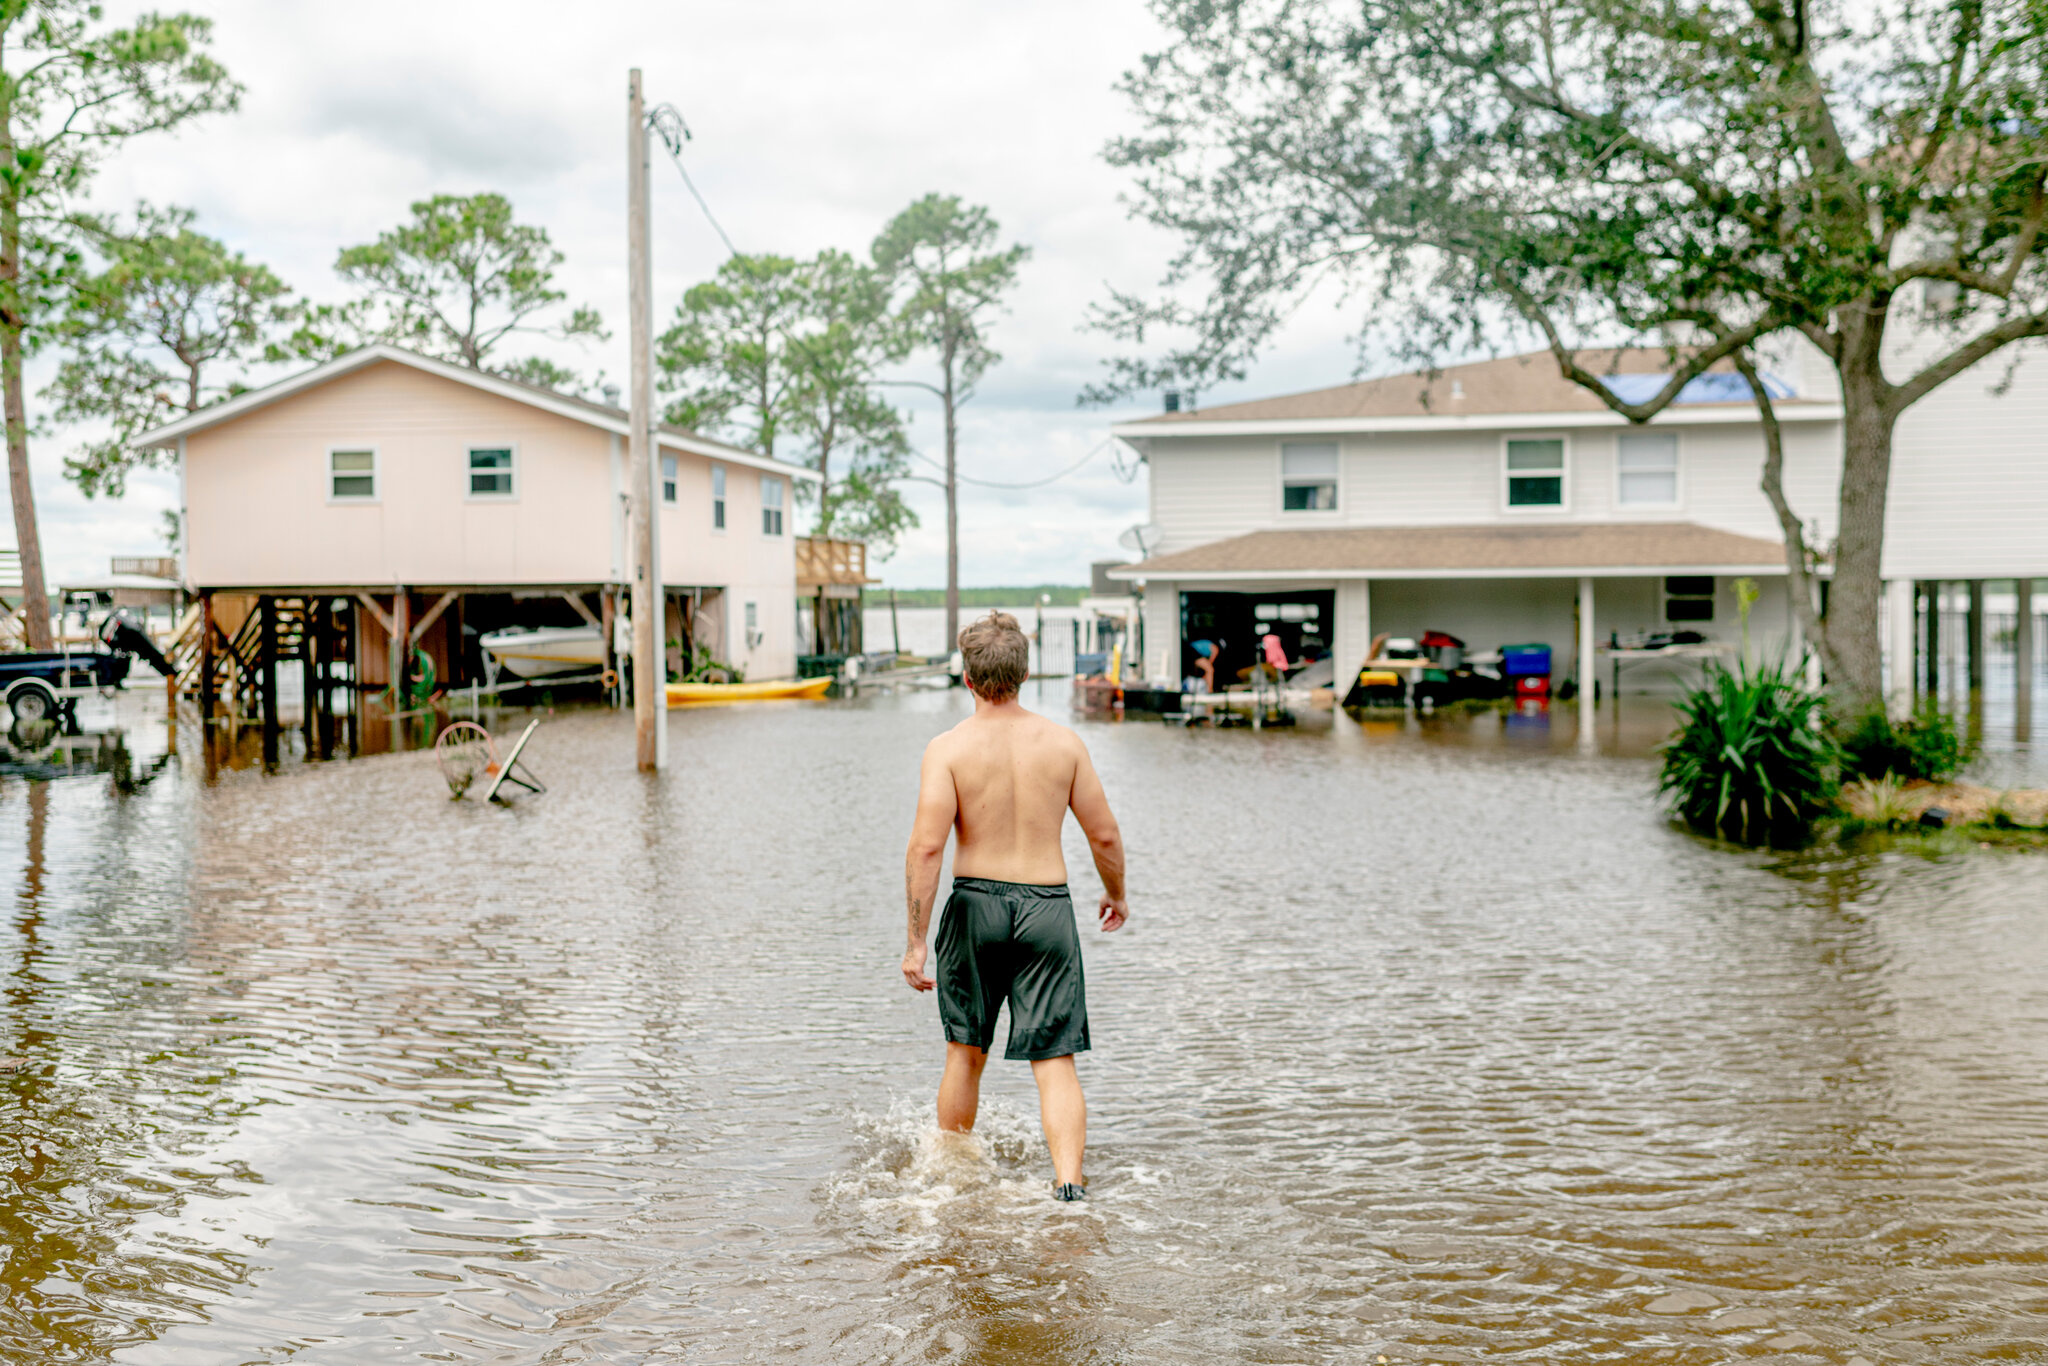

FEMA has an annual budget of [$28.7 billion](https://en.wikipedia.org/wiki/Federal_Emergency_Management_Agency). This was according to the 2020 fiscal year.

Which state received the most federal funding [ relating to natural disasters ] from 2017 to 2021?

In [72]:
FEMA.groupby('TotalObligated').max()

DeclarationDate  ... FederalShareObligated
TotalObligated                            ...                      
0.000000e+00    2020-08-17T04:00:00.000Z  ...          0.000000e+00
4.820000e+00    2018-10-11T04:00:00.000Z  ...          4.820000e+00
1.686000e+01    2018-04-17T04:00:00.000Z  ...          1.686000e+01
1.800000e+01    2018-09-16T04:00:00.000Z  ...          1.800000e+01
2.678000e+01    2017-02-24T05:00:00.000Z  ...          2.678000e+01
...                                  ...  ...                   ...
1.313498e+09    2020-03-25T04:00:00.000Z  ...          1.313498e+09
2.065211e+09    2017-09-20T04:00:00.000Z  ...          2.065211e+09
3.662729e+09    2017-09-20T04:00:00.000Z  ...          3.662729e+09
4.527483e+09    2020-03-25T04:00:00.000Z  ...          4.527483e+09
9.459885e+09    2017-09-20T04:00:00.000Z  ...          9.459885e+09

[75805 rows x 9 columns]

In [73]:
YEAR17.groupby('TotalObligated').max()

DeclarationDate  ... FederalShareObligated
TotalObligated                            ...                      
0.000000e+00    2017-12-20T05:00:00.000Z  ...          0.000000e+00
2.678000e+01    2017-02-24T05:00:00.000Z  ...          2.678000e+01
4.052000e+01    2017-06-16T04:00:00.000Z  ...          4.052000e+01
5.195000e+01    2017-06-16T04:00:00.000Z  ...          5.195000e+01
5.815000e+01    2017-03-16T04:00:00.000Z  ...          5.815000e+01
...                                  ...  ...                   ...
9.454298e+08    2017-09-20T04:00:00.000Z  ...          9.454298e+08
1.122766e+09    2017-09-20T04:00:00.000Z  ...          1.122766e+09
2.065211e+09    2017-09-20T04:00:00.000Z  ...          2.065211e+09
3.662729e+09    2017-09-20T04:00:00.000Z  ...          3.662729e+09
9.459885e+09    2017-09-20T04:00:00.000Z  ...          9.459885e+09

[33629 rows x 9 columns]

In [74]:
YEAR18.groupby('TotalObligated').max()

DeclarationDate  ... FederalShareObligated
TotalObligated                            ...                      
0.000000e+00    2018-12-18T05:00:00.000Z  ...          0.000000e+00
4.820000e+00    2018-10-11T04:00:00.000Z  ...          4.820000e+00
1.686000e+01    2018-04-17T04:00:00.000Z  ...          1.686000e+01
1.800000e+01    2018-09-16T04:00:00.000Z  ...          1.800000e+01
4.500000e+01    2018-10-11T04:00:00.000Z  ...          4.500000e+01
...                                  ...  ...                   ...
7.675568e+07    2018-11-12T05:00:00.000Z  ...          7.675568e+07
8.491510e+07    2018-10-11T04:00:00.000Z  ...          8.491510e+07
1.608398e+08    2018-01-02T05:00:00.000Z  ...          1.608398e+08
1.997674e+08    2018-08-04T04:00:00.000Z  ...          1.997674e+08
4.914622e+08    2018-11-12T05:00:00.000Z  ...          4.914622e+08

[15363 rows x 9 columns]

In [75]:
YEAR19.groupby('TotalObligated').max()

DeclarationDate  ... FederalShareObligated
TotalObligated                            ...                      
0.00            2019-11-18T05:00:00.000Z  ...                  0.00
65.28           2019-04-08T04:00:00.000Z  ...                 65.28
97.71           2019-07-09T04:00:00.000Z  ...                 97.71
120.60          2019-03-21T04:00:00.000Z  ...                120.60
120.98          2019-08-27T04:00:00.000Z  ...                120.98
...                                  ...  ...                   ...
7228129.13      2019-05-02T04:00:00.000Z  ...            7228129.13
8952068.43      2019-01-31T05:00:00.000Z  ...            8952068.43
9899265.88      2019-09-30T04:00:00.000Z  ...            9899265.88
11622601.50     2019-10-04T04:00:00.000Z  ...           11622601.50
11787098.43     2019-06-03T04:00:00.000Z  ...           11787098.43

[18814 rows x 9 columns]

In [76]:
YEAR20.groupby('TotalObligated').max()

DeclarationDate  ... FederalShareObligated
TotalObligated                            ...                      
0.000000e+00    2020-08-17T04:00:00.000Z  ...          0.000000e+00
1.417500e+02    2020-08-28T04:00:00.000Z  ...          1.417500e+02
1.663100e+02    2020-09-23T04:00:00.000Z  ...          1.663100e+02
1.705800e+02    2020-09-23T04:00:00.000Z  ...          1.705800e+02
1.814000e+02    2020-09-15T04:00:00.000Z  ...          1.814000e+02
...                                  ...  ...                   ...
4.686548e+08    2020-03-22T04:00:00.000Z  ...          4.686548e+08
5.086747e+08    2020-03-22T04:00:00.000Z  ...          5.086747e+08
7.588894e+08    2020-03-25T04:00:00.000Z  ...          7.588894e+08
1.313498e+09    2020-03-25T04:00:00.000Z  ...          1.313498e+09
4.527483e+09    2020-03-25T04:00:00.000Z  ...          4.527483e+09

[8808 rows x 9 columns]

In [77]:
YEAR21.groupby('TotalObligated').max()

DeclarationDate  ... FederalShareObligated
TotalObligated                            ...                      
4519.05         2021-01-12T05:00:00.000Z  ...               4519.05
4751.18         2021-01-12T05:00:00.000Z  ...               4751.18
5813.83         2021-01-12T05:00:00.000Z  ...               5813.83
7367.84         2021-01-12T05:00:00.000Z  ...               7367.84
10173.72        2021-01-12T05:00:00.000Z  ...              10173.72
32619.96        2021-01-12T05:00:00.000Z  ...              32619.96
38358.00        2021-01-12T05:00:00.000Z  ...              38358.00
45917.66        2021-01-12T05:00:00.000Z  ...              45917.66
58084.80        2021-01-12T05:00:00.000Z  ...              58084.80
61971.83        2021-01-12T05:00:00.000Z  ...              61971.83
487959.42       2021-01-12T05:00:00.000Z  ...             487959.42

[11 rows x 9 columns]

# **Conclusion and Interpretation**

Overall, Puerto Rico received the most funding from FEMA - $9,459,885,412 due to [Hurricane Maria](https://time.com/hurricane-maria-destruction-photos/). However, on a yearly basis, the following states received the most FEMA funding: 


1.   **2017**: Puerto Rico (info above)

2.   **2018**: California - $491,462,239 - **Reason**: [Fire](https://www.fire.ca.gov/incidents/2018/) 🔥 

3.   **2019**: Louisiana -  $11,787,098 - **Reason**: [Severe storm](https://www.nesdis.noaa.gov/content/severe-thunderstorms-and-tornadoes-sweep-across-northern-and-central-louisiana) ⛈ 

4.   **2020**: Texas - $4,527,483,394 - **Reason**: [Biological](https://www.dshs.texas.gov/news/releases/2020/20200304.aspx) 😷 (def: a naturally    occurring
biological diseases [communicable and noncommunicable] in humans as well as terrorist
events.

5.   **2021 (so far)**: Louisiana - $487,959 - **Reason**: [Hurricane](https://973thedawg.com/hurricane-season-2021-a-preview-of-what-louisiana-can-expect/) 🌬 



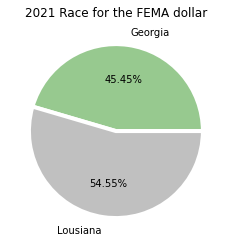

In [94]:
Georgia = YEAR21.loc[YEAR21['State'] == 'Georgia'].count()[0]
Louisiana = YEAR21.loc[YEAR21['State'] == 'Louisiana'].count()[0]

labels = ['Georgia', 'Lousiana']
colors = ['#97c98f', '#C0C0C0']
plt.pie([Georgia, Louisiana], labels = labels, labeldistance= 1.15, colors = colors, wedgeprops = { 'linewidth' : 4, 'edgecolor' : 'white' }, autopct = '%.2f%%')

plt.title('2021 Race for the FEMA dollar')

plt.show()

# **Bonus**

As of April 2021, only Georgia and Lousiana have requested funding from FEMA due to their respective hurricane damages. It is a close race, but 54.55% of applications have come from Lousiana, with 45.45% from Georgia. 

# **Question III**

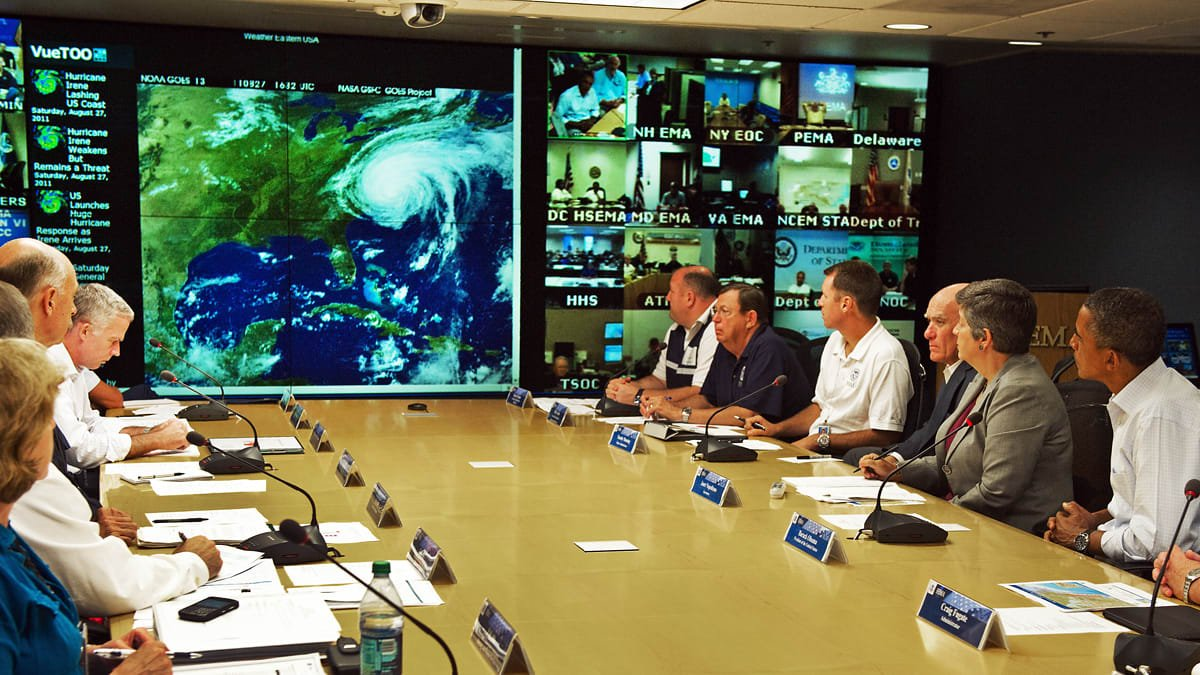

Which year [between 2017 and 2021] was the most federal funding given to natural disasters in the U.S.?

In [95]:
YEAR17.TotalObligated.sum()

33385414366.030006

In [96]:
YEAR18.TotalObligated.sum()

5248042166.74

In [97]:
YEAR19.TotalObligated.sum()

1516944497.6599998

In [98]:
YEAR20.TotalObligated.sum()

21840573426.21

# **Conclusion and Interpretation**


With 2017 having the most incident applications, it makes sense that 2017 also 
had the highest amount of money allocated to these incidents. 

FEMA donated 33,385,414,366 in the year 2017. 

With a yearly budget of 28.7 billion, this means they went over budget by about 4.7 billion. 

One can hope that they went under budget for the year 2016.

# **Question VI**

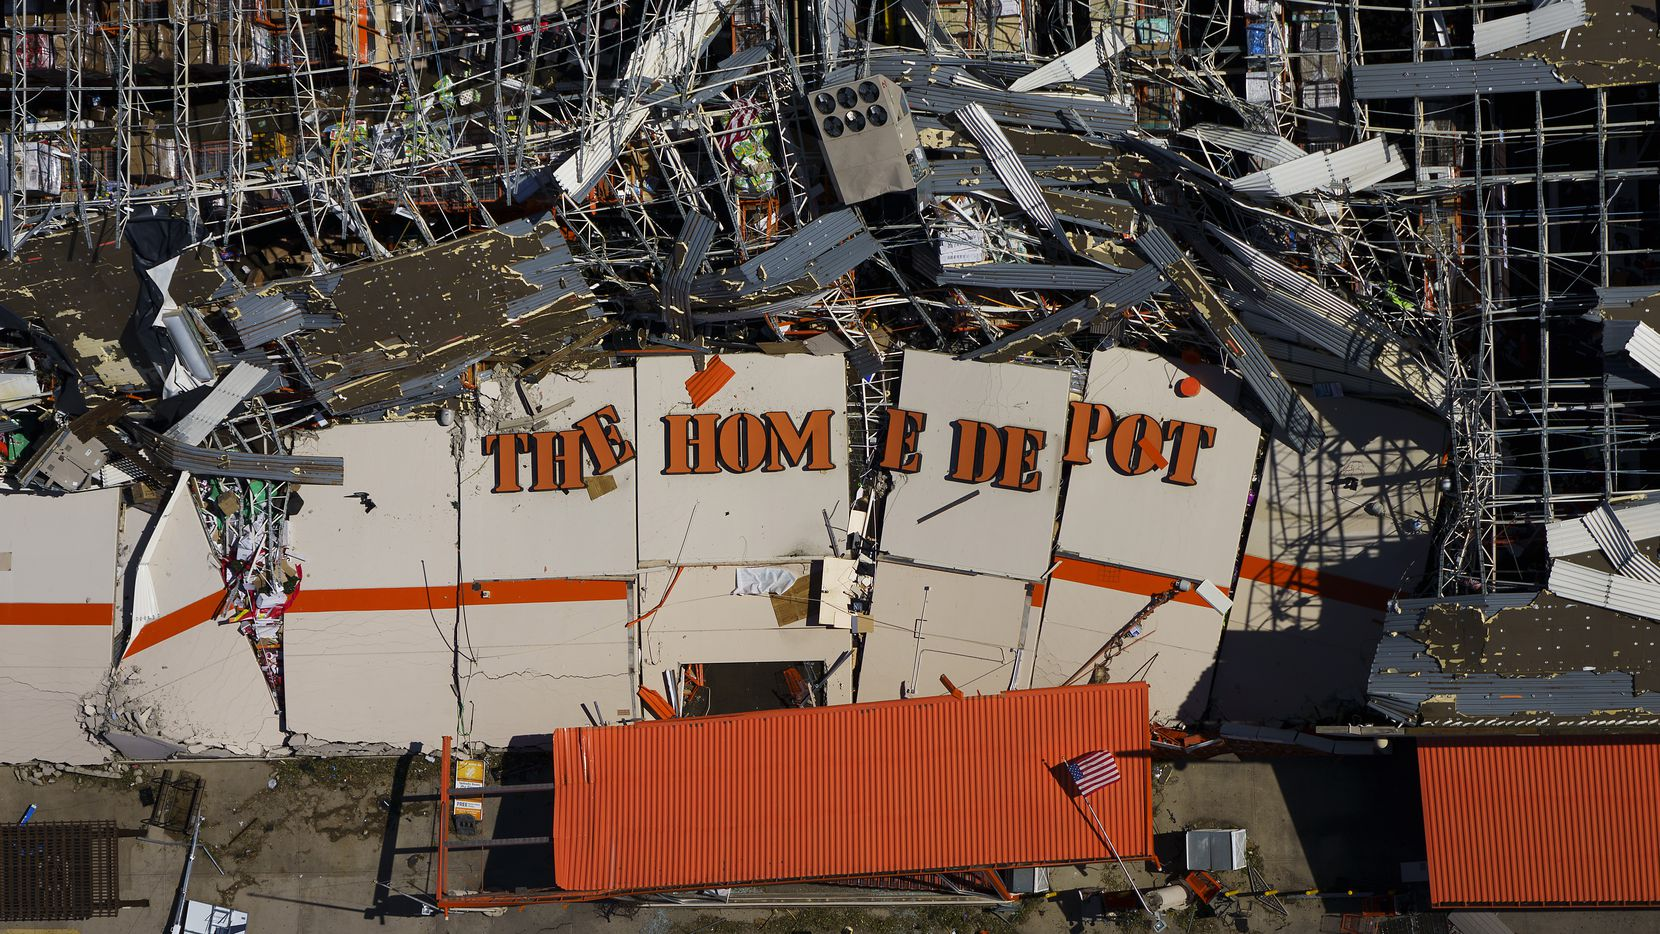

Overall, what type of natural disaster was the most commonly reported from 2017 to 2021?

In [125]:
FEMA.IncidentType.value_counts()

Hurricane           33885
Flood               19811
Severe Storm(s)     15343
Biological           5398
Snow                 1354
Fire                 1297
Tornado               734
Earthquake            463
Typhoon               331
Severe Ice Storm      145
Mud/Landslide         121
Coastal Storm         118
Dam/Levee Break        87
Volcano                53
Name: IncidentType, dtype: int64

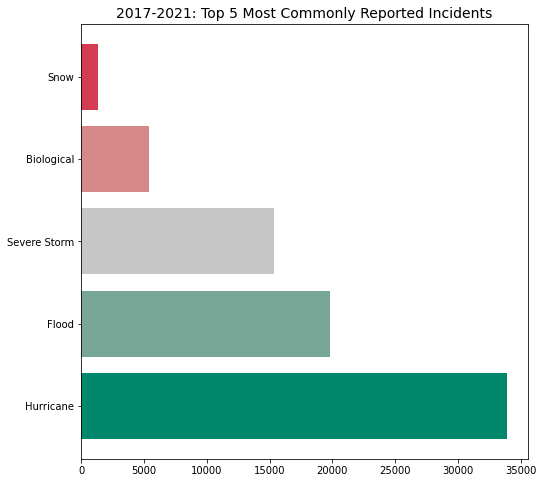

In [140]:
height = [33885, 19811, 15343, 5398, 1354]
bars = ('Hurricane', 'Flood', 'Severe Storm', 'Biological', 'Snow')
y_pos = np.arange(len(bars))

plt.title('2017-2021: Top 5 Most Commonly Reported Incidents', fontsize = 14)
 
plt.barh(y_pos, height, color = ('#00876c', '#78a798', '#c6c6c6', '#d68889', '#d43d51'))
 
plt.yticks(y_pos, bars)
 
plt.show()

# **Conclusion and Interpretation**

Hurricanes, by far, were the most commonly reported incident type with over 30,000 reports being related to hurricane damage. This is followed by floods, severe storms, biological, and snow reports. 

# **Question V**

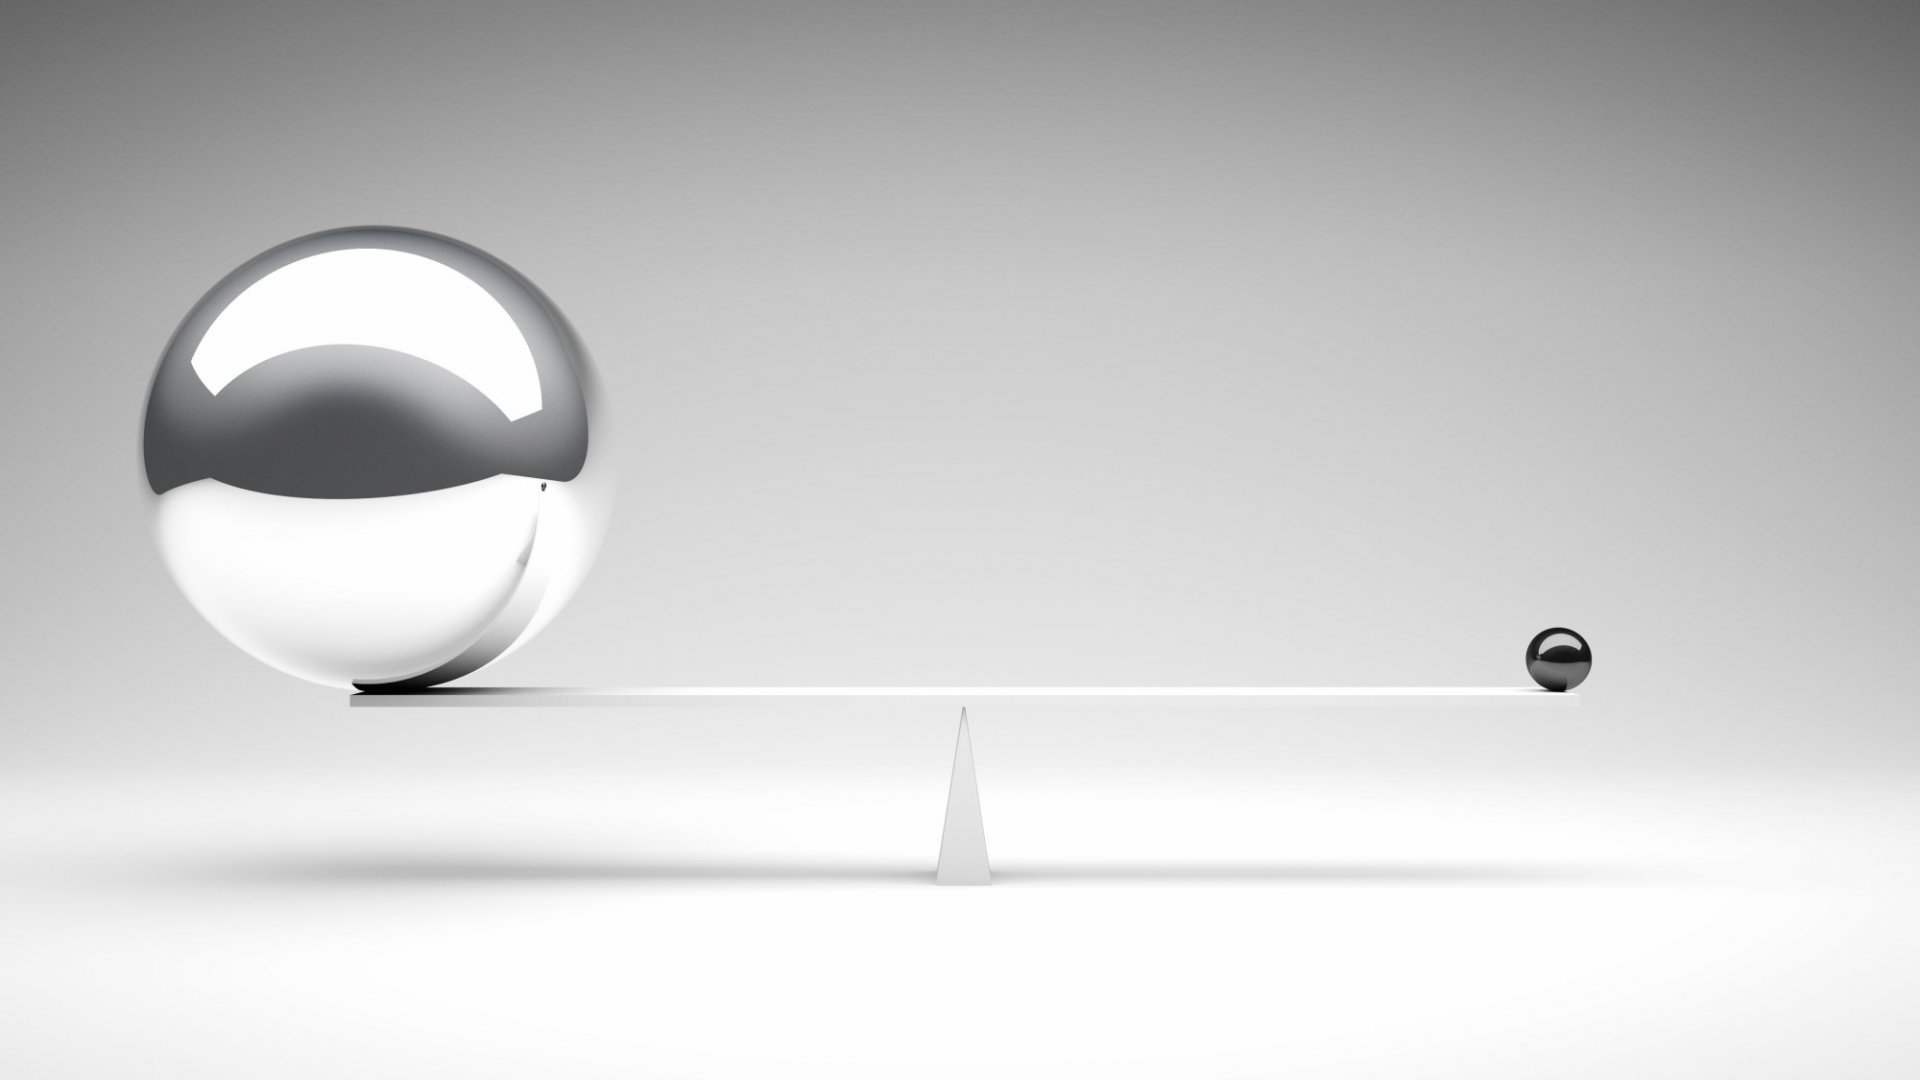

“FEMA will continue to fund the recovery for smaller disasters, but increasingly, we will be looking for state and local governments to manage those programs,” Kaniewski said. “I will assert, maybe that’s a high goal. It depends on what state or what community you’re talking about — whether or not they can step up and manage those programs.” (Federal News Network, 2018)

From 2017 to 2021, how many projects were large vs. small?

In [127]:
FEMA.ProjectSize.value_counts()

Small    61921
Large    17219
Name: ProjectSize, dtype: int64

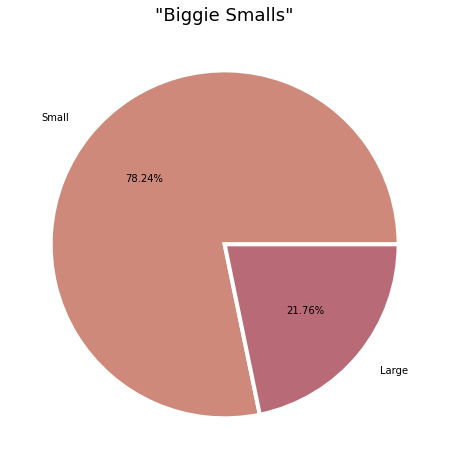

In [135]:
Small = FEMA.loc[FEMA['ProjectSize'] == 'Small'].count()[0]
Large = FEMA.loc[FEMA['ProjectSize'] == 'Large'].count()[0]

labels = ['Small', 'Large']
colors = ['#ce897b', '#B86B77']
plt.pie([Small, Large], labels = labels, labeldistance= 1.15, colors = colors, wedgeprops = { 'linewidth' : 4, 'edgecolor' : 'white' }, autopct = '%.2f%%')

plt.title('"Biggie Smalls"', fontsize = 18)

plt.show()

# **Conclusion and Interpretation**

Almost 80% of reports are related to small events. What defines an event as large or small is the amount of money needed to complete it. The threshold is adjusted annually for inflation. For Fiscal Year 2020, that threshold was $131,100. 

# **Question VI**

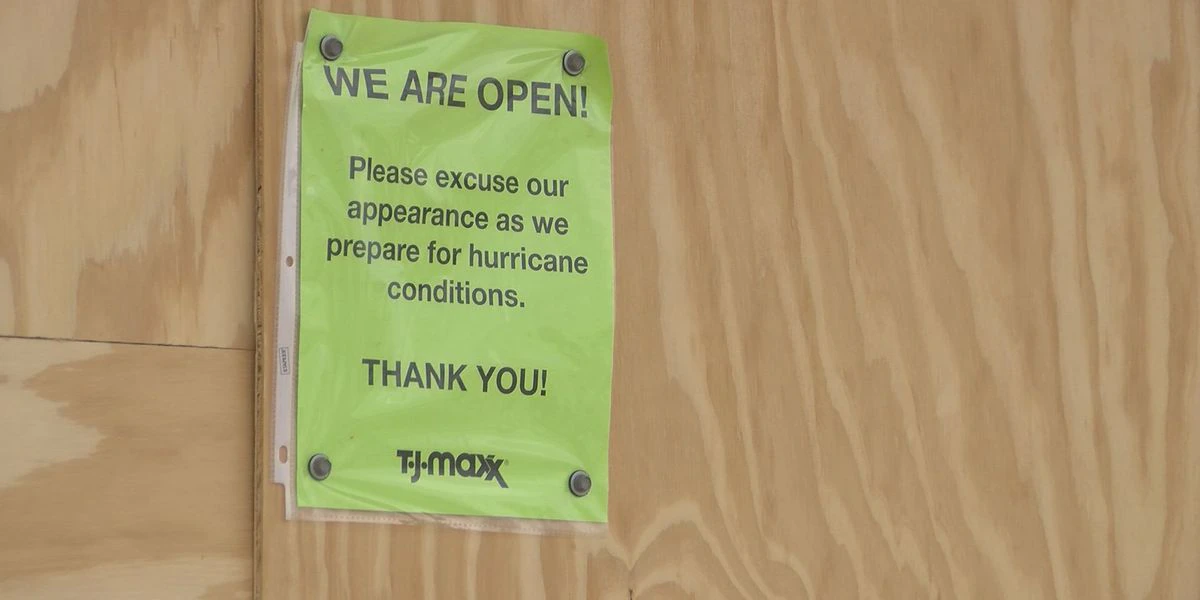

Before a storm arrives, during, and after, there is a lot that needs to be done. 

From 2017 to 2021, what was the most common occuring DCC?

In [132]:
FEMA.DamageCategoryCode.value_counts()

B - Protective Measures         19638
C - Roads & Bridges             19554
E - Public Buildings            10327
A - Debris Removal               8771
Z - State Management             8499
G - Recreational or Other        6167
F - Public Utilities             4489
D - Water Control Facilities     1540
C - Roads and Bridges             155
Name: DamageCategoryCode, dtype: int64

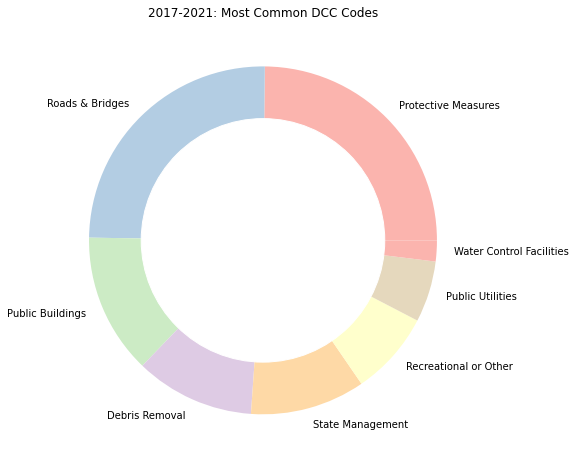

In [139]:
import matplotlib.pyplot as plt
from palettable.colorbrewer.qualitative import Pastel1_7
 
names = ['Protective Measures', 'Roads & Bridges', 'Public Buildings', 'Debris Removal', 'State Management', 'Recreational or Other', 'Public Utilities', 'Water Control Facilities']
size = [19638, 19709, 10327, 8771, 8449, 6167, 4489, 1540]

plt.title('2017-2021: Most Common DCC Codes')
 
my_circle = plt.Circle( (0,0), 0.7, color='white')

from palettable.colorbrewer.qualitative import Pastel1_7
plt.pie(size, labels=names, colors=Pastel1_7.hex_colors)
p = plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

# **Conclusion and Interpretation**

'Protective Measures' and 'Roads & Bridges' are nearly tied with 19,638 and 19,709 reports respectively. Protective measures include search & rescue, emergency medical facilities, emergency evacuations, detour & warning signs, etc. Roads & Bridges concerns the rebuilding of those transportation platforms after a disaster. 